In [10]:

class ImageIndexer:
    def __init__(self, image_dir, vector_size):
        self.image_dir = image_dir
        self.vector_size = vector_size
    
    def get_image_paths(self):
        return [os.path.join(self.image_dir, f) for f in os.listdir(self.image_dir)]
    
    def process_image(self, path):
        # Lire l'image en couleur
        img = cv2.imread(path)
        
        # Convertir l'image en niveaux de gris
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Redimensionner l'image en un vecteur de taille fixe
        resized = cv2.resize(gray, (self.vector_size, self.vector_size))
        vector = resized.reshape((1, -1))
        
        return vector
    
    def index_images(self):
        # Obtenir les chemins de toutes les images dans une liste
        paths = self.get_image_paths()
        
        # Initialiser une liste pour stocker les vecteurs d'images
        vectors = []
        
        # Boucler sur chaque image et extraire son vecteur
        for path in paths:
            vector = self.process_image(path)
            vectors.append(vector)
        
        # Concaténer tous les vecteurs pour créer une matrice
        matrix = np.concatenate(vectors, axis=0)
        
        return matrix


In [11]:
#import cv2
import numpy as np
import os
from skimage.io import imread,imshow
from skimage.color import rgb2gray
from matplotlib import pyplot as plt
from skimage.transform import resize

In [12]:
dir_path = os.getcwd()


In [18]:
data_path=dir_path+'\\img'
nameslist = os.listdir(data_path)
nameslist

['img_3015.jpg', 'Toyota.jpg']

In [19]:
imagespath=[]
for name in nameslist:
   
   image_path = os.path.join(data_path, name) 
   if image_path.endswith('.jpg'):
    imagespath.append(image_path)

(1, 20000)
(1, 20000)


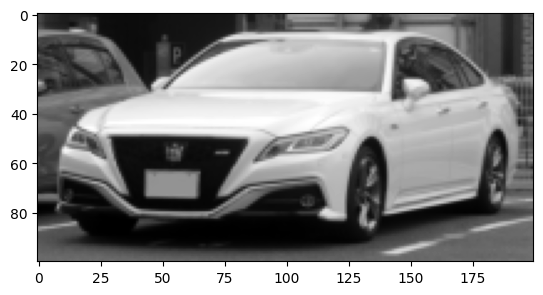

In [43]:
X = np.zeros((len(imagespath),100*200))
images=[]
i=0
for path in imagespath:   
   I = imread(path)
   gray_image = rgb2gray(I)
   #plt.imshow(I)
   I1 = resize(gray_image, (100,200))
   plt.imshow(I1, cmap='gray') 
   I1=I1.flatten().reshape(1, -1)
   print(I1.shape) 
   images.append(I1)
   # Ajouter le vecteur à la matrice
   X[i,:] = I1
   i=i+1

In [47]:
X

array([[0.32664674, 0.32852328, 0.32729486, ..., 0.54054186, 0.57688815,
        0.5637004 ],
       [0.28276613, 0.27548974, 0.23119947, ..., 0.42792299, 0.43215694,
        0.42827915]])

(1, 20000)


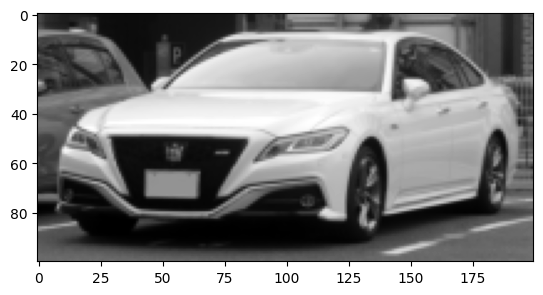

In [49]:
# on new image 
Xi = np.zeros((len(imagespath),100*200))
images=[]
i=0
imgpath=dir_path+'\\imgquery\\test.jpg'
I = imread(imgpath)
gray_image = rgb2gray(I)
I1 = resize(gray_image, (100,200))
plt.imshow(I1, cmap='gray') 
I1=I1.flatten().reshape(1, -1)
print(I1.shape) 
Xi[0,:] = I1


In [50]:
Xi

array([[0.28276613, 0.27548974, 0.23119947, ..., 0.42792299, 0.43215694,
        0.42827915],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])